# Homework 6

Find the z coordinate of a ball thrown upwards at 10 m/s as a function of time using the Runge-Kutta method.


\begin{equation}
\frac{d^2z}{dt^2} = -g
\end{equation}

We can separate this:

\begin{equation}
\frac{dz}{dt} = v
\end{equation}

\begin{equation}
\frac{dv}{dt} = -g
\end{equation}


Our initial conditions are $z(0) = 0$, $v(0) = 10 ~\text{m s}^{-1}$

z[-1] - 0 = -8.882e-16 m
v[-1] - v[0] = -1.776e-15 m/s
z[-1] - 0 = -1.332e-15 m
v[-1] - v[0] = -1.776e-15 m/s
z[-1] - 0 = -1.887e-15 m
v[-1] - v[0] = -1.776e-15 m/s
z[-1] - 0 = -4.552e-15 m
v[-1] - v[0] = -3.553e-15 m/s
z[-1] - 0 = -1.166e-15 m
v[-1] - v[0] = -1.776e-15 m/s
z[-1] - 0 = 8.882e-16 m
v[-1] - v[0] = 1.776e-15 m/s


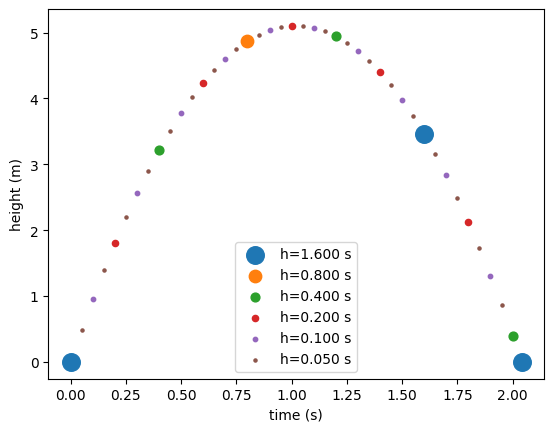

In [1]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt

GRAV = 9.8 # m s-1
Z0 = 0.0 # m
V0 = 10.0 # m s-1
TEND_EXP = V0/GRAV * 2 # s
H = 0.01 # s


def f(t:float,y:np.ndarray):
    """
    derivative of y where y=[z,v]
    """
    return np.array([
        y[1],
        -1*GRAV
    ])

def rk4(
    t:float,
    h:float,
    y:np.ndarray,
    _f:Callable,
    n:int
):
    """
    4th order Runge-Kutta integrator
    
    Parameters
    ----------
    t : float
        The current time in seconds.
    h : float
        The timestep in seconds.
    y : numpy.ndarray
        The current values of the variables [z,v] in [m, m s-1]
    n : int
        The number of elements in y.
    
    Returns
    -------
    numpy.ndarray
        The next value of y.
    """
    
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*_f(t,y)
    k2=h*_f(t+0.5*h,y+0.5*k1)
    k3=h*_f(t+0.5*h,y+0.5*k2)
    k4=h*_f(t+h,y+k3)
    y+=1./6.*(k1+2*k2+2*k3+k4)
    return y

def integrate(
    tend:float,
    z0:float,
    v0:float,
    h:float,
    _f:Callable
):
    """
    Integrate using 4th order Runge-Kutta
    
    Parameters
    ----------
    tend : float
        The end time in seconds.
    z0 : float
        The initial height in meters.
    v0 : float
        The initial velocity in meters per second.
    h : float
        The timestep in seconds.
    _f : Callable
        The function to integrate.
    
    Returns
    -------
    numpy.ndarray
        The time values in seconds.
    numpy.ndarray
        The height values in meters.
    numpy.ndarray
        The velocity values in meters per second.
    """
    t = 0.
    y = np.array([z0,v0])
    ts = [t]
    zs = [z0]
    vs = [v0]
    while t < tend:
        timestep = tend - t if t + h > tend else h
        y = rk4(t,timestep,y,_f,2)
        t+=timestep
        ts.append(t)
        zs.append(y[0])
        vs.append(y[1])
        
    return (
        np.array(ts),
        np.array(zs),
        np.array(vs)
    )



# t,z,v = integrate(TEND_EXP,Z0,V0,H,f)
for h in [1.6,0.8,0.4,0.2,0.1,0.05]:
    t,z,v = integrate(TEND_EXP,Z0,V0,h,f)
    dz = z[-1]
    dv = v[-1] + v[0]
    print(f'z[-1] - 0 = {dz:.3e} m')
    print(f'v[-1] - v[0] = {dv:.3e} m/s')
    plt.scatter(t,z,zorder=h,label=f"h={h:.3f} s",s=h*100)


plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.legend()


Because the Runga-Kutta method is 4th order and the analytical solution to this problem is a parabaola, the values of $z$ and $v$ at the endpoint only suffer error from finite machine precision.